In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from utils import get_train_test_loaders, CustomVGG, train, evaluate

## Parameters

In [5]:
data_folder = "data/cortica"
input_size = (224, 224)
batch_size = 10
lr = 0.0001
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data

In [6]:
train_loader, test_loader = get_train_test_loaders(
    root=data_folder,
    batch_size=batch_size,
    img_size=input_size,
    test_size=0.2,
    random_state=42,
)

# Model Training

In [8]:
model = CustomVGG(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [9]:
model = train(train_loader, model, optimizer, criterion, epochs, device)

Epoch 1/10: 

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Loss = 0.3728, Accuracy = 0.9000
Epoch 2/10: Loss = 0.3068, Accuracy = 0.9000
Epoch 3/10: Loss = 0.2801, Accuracy = 0.9000
Epoch 4/10: Loss = 0.2281, Accuracy = 0.9083
Epoch 5/10: Loss = 0.1809, Accuracy = 0.9417
Epoch 6/10: Loss = 0.1085, Accuracy = 0.9542
Epoch 7/10: Loss = 0.0733, Accuracy = 0.9833
Epoch 8/10: Loss = 0.0544, Accuracy = 0.9792
Epoch 9/10: Loss = 0.0281, Accuracy = 0.9875
Epoch 10/10: Loss = 0.0049, Accuracy = 1.0000


# Evaluation

Accuracy: 0.9508
Balanced Accuracy: 0.7500



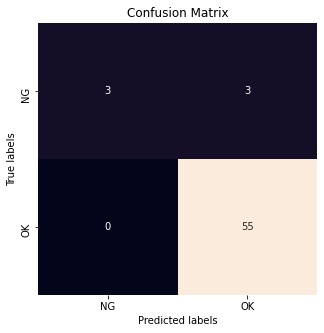

In [19]:
evaluate(model, test_loader, device)

# Visualization

In [20]:
for batch in train_loader:
    break

In [21]:
preds = model(batch[0].to(device))

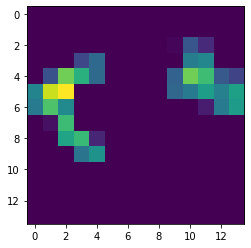

In [30]:
plt.imshow(preds[2][0][0].cpu().detach().numpy())

In [ ]:
def predict(model, data_batch, device):
    
    model.to(device)
    model.eval()
    
    